In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\Ritesh\Downloads\car_evaluation.csv")

In [3]:
df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [4]:
df.shape

(1727, 7)

In [5]:
col_names = ['buying','maint','doors','persons','lug_boot','safety','class']
df.columns = col_names


In [6]:
df.head(10)

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
5,vhigh,vhigh,2,2,big,low,unacc
6,vhigh,vhigh,2,2,big,med,unacc
7,vhigh,vhigh,2,2,big,high,unacc
8,vhigh,vhigh,2,4,small,low,unacc
9,vhigh,vhigh,2,4,small,med,unacc


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [8]:
col_names = ['buying','maint','doors','persons','lug_boot','safety','class']
for col in col_names:
    print(df[col].value_counts())
    print("\n")

high     432
med      432
low      432
vhigh    431
Name: buying, dtype: int64


high     432
med      432
low      432
vhigh    431
Name: maint, dtype: int64


3        432
4        432
5more    432
2        431
Name: doors, dtype: int64


4       576
more    576
2       575
Name: persons, dtype: int64


med      576
big      576
small    575
Name: lug_boot, dtype: int64


med     576
high    576
low     575
Name: safety, dtype: int64


unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64




In [9]:
df['class'].value_counts()

unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [10]:
X = df.drop(['class'],axis = 1)
y = df['class']

In [11]:
X.shape,y.shape

((1727, 6), (1727,))

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [13]:
X_train.shape,X_test.shape

((1157, 6), (570, 6))

In [14]:
X_train.head(3)

,buying,maint,doors,persons,lug_boot,safety
83,vhigh,vhigh,5more,2,med,low
48,vhigh,vhigh,3,more,med,med
468,high,vhigh,3,4,small,med


In [15]:
X_test.head(3)

,buying,maint,doors,persons,lug_boot,safety
599,high,high,4,2,big,low
932,med,vhigh,4,4,big,low
628,high,high,5more,2,big,high


In [16]:
import category_encoders as ce

In [17]:
encoder = ce.OrdinalEncoder(cols = ['buying','maint','doors','persons','lug_boot','safety'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [18]:
X_train.head(3)

,buying,maint,doors,persons,lug_boot,safety
83,1,1,1,1,1,1
48,1,1,2,2,1,2
468,2,1,2,3,2,2


In [19]:
X_test.head(3)

,buying,maint,doors,persons,lug_boot,safety
599,2,2,3,1,3,1
932,3,1,3,3,3,1
628,2,2,1,1,3,3


In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
dt = DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=0)
dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [22]:
y_pred = dt.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score
x = accuracy_score(y_test,y_pred)
print(f"The model accuracy with criterion entropy is {x}")

The model accuracy with criterion entropy is 0.8052631578947368


In [24]:
y_pred_train = dt.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.7848


In [25]:
print('Training set score: {:.4f}'.format(dt.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(dt.score(X_test, y_test)))

Training set score: 0.7848
Test set score: 0.8053


[Text(0.3333333333333333, 0.875, 'X[5] <= 1.5\nentropy = 1.206\nsamples = 1157\nvalue = [257, 51, 810, 39]'),
 Text(0.16666666666666666, 0.625, 'entropy = 0.0\nsamples = 391\nvalue = [0, 0, 391, 0]'),
 Text(0.5, 0.625, 'X[3] <= 1.5\nentropy = 1.484\nsamples = 766\nvalue = [257, 51, 419, 39]'),
 Text(0.3333333333333333, 0.375, 'entropy = 0.0\nsamples = 242\nvalue = [0, 0, 242, 0]'),
 Text(0.6666666666666666, 0.375, 'X[0] <= 2.5\nentropy = 1.639\nsamples = 524\nvalue = [257, 51, 177, 39]'),
 Text(0.5, 0.125, 'entropy = 0.997\nsamples = 266\nvalue = [124, 0, 142, 0]'),
 Text(0.8333333333333334, 0.125, 'entropy = 1.758\nsamples = 258\nvalue = [133, 51, 35, 39]')]

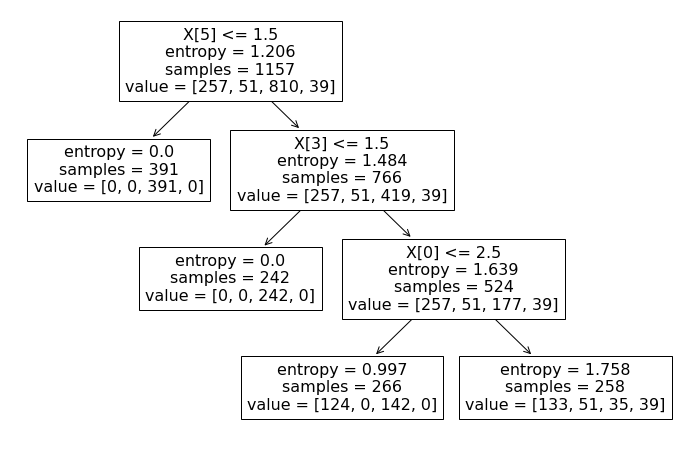

In [26]:
plt.figure(figsize = (12,8))
from sklearn import tree
tree.plot_tree(dt.fit(X_train,y_train))

In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix \n\n",cm)

Confusion Matrix 

 [[ 71   0  56   0]
 [ 18   0   0   0]
 [ 11   0 388   0]
 [ 26   0   0   0]]


In [31]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         acc       0.56      0.56      0.56       127
        good       0.00      0.00      0.00        18
       unacc       0.87      0.97      0.92       399
       vgood       0.00      0.00      0.00        26

    accuracy                           0.81       570
   macro avg       0.36      0.38      0.37       570
weighted avg       0.74      0.81      0.77       570



C:\Users\Ritesh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ritesh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ritesh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
